## Attempting to add the Styx stream to my BooIII model
### will be using MWPotential2014 as well as Andrew Pace's 6D data

In [18]:
from galpy.orbit import Orbit
from galpy import potential
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from IPython.display import HTML
from galpy.potential import MWPotential2014
from galpy.util import conversion
from streamtools.df import streamspraydf

from stream_package.stream_package import graphics

In [19]:
# Galpy scaling factors
ro = 8.
vo = 220.
to = conversion.time_in_Gyr(ro = ro, vo = vo)
mo = conversion.mass_in_msol(ro = ro, vo = vo)


# Boo3 properties to model stream:
mass = 1.82E7 * 5 
tdisrupt = 5
nstar = 100

pot = MWPotential2014

sixD_pace = [209.3, 26.8, 46.5, -1.176, -0.89, 197.5]
o = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)

# Styx properties- hopefully
sixD_prograde = [209.1, 26.8, 45, -0.23, -0.6, -42]
sixD_retrograde = [209.1, 26.8, 45, -1.05, -0.95, -22]
osp = Orbit(vxvv = sixD_prograde, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
osr = Orbit(vxvv = sixD_retrograde, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)

o.turn_physical_off()
osp.turn_physical_off()
osr.turn_physical_off()

In [3]:
# Model stream of Boo3
oall, oleading, otrailing, dtall, dt, dtt = graphics.streamorbits(mass, o, tdisrupt, pot, nstar)

In [4]:
# Integrating orbits
delt = np.linspace(0, -tdisrupt/to, 1000)

o.integrate(delt, pot)
osp.integrate(delt, pot)
osr.integrate(delt, pot)

## Prograde orbit

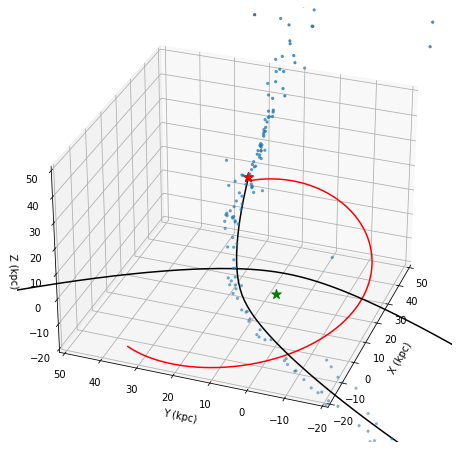

In [5]:
# 3D projection in x,y,z
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(oall.x(), oall.y(), oall.z(), marker='.')
ax.scatter(o.x()*ro, o.y()*ro, o.z()*ro, marker='*', c='k', s = 100)

# Plotting the stream orbit
ax.plot(osp.x(delt[:150])*ro, osp.y(delt[:150])*ro, osp.z(delt[:150])*ro, c='r')
ax.scatter(o.x()*ro, o.y()*ro, o.z()*ro, marker='*', c='r', s = 100)

# plotting the orbit of Boo3 over past 5yrs
ax.plot(o.x(delt)*ro, o.y(delt)*ro, o.z(delt)*ro, c = 'k')

# Adding the centre of MW:
ax.scatter(0,0,0, marker = '*', c='g', s=100)

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')

ax.set_xlim(-20,50)
ax.set_ylim(-20,50)
ax.set_zlim(-20,50)

ax.view_init(30,200)
plt.show()

## Retrograde orbit

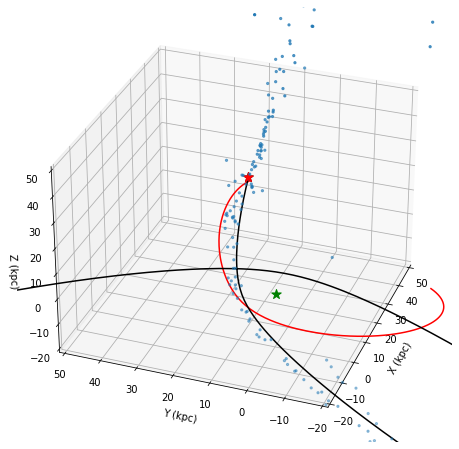

In [6]:
# 3D projection in x,y,z
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(oall.x(), oall.y(), oall.z(), marker='.')
ax.scatter(o.x()*ro, o.y()*ro, o.z()*ro, marker='*', c='k', s = 100)

# Plotting the stream orbit
ax.plot(osr.x(delt[:150])*ro, osr.y(delt[:150])*ro, osr.z(delt[:150])*ro, c='r')
ax.scatter(o.x()*ro, o.y()*ro, o.z()*ro, marker='*', c='r', s = 100)

# plotting the orbit of Boo3 over past 5yrs
ax.plot(o.x(delt)*ro, o.y(delt)*ro, o.z(delt)*ro, c = 'k')

# Adding the centre of MW:
ax.scatter(0,0,0, marker = '*', c='g', s=100)

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')

ax.set_xlim(-20,50)
ax.set_ylim(-20,50)
ax.set_zlim(-20,50)


ax.view_init(30,200)
plt.show()

Text(0, 0.5, 'Z (kpc)')

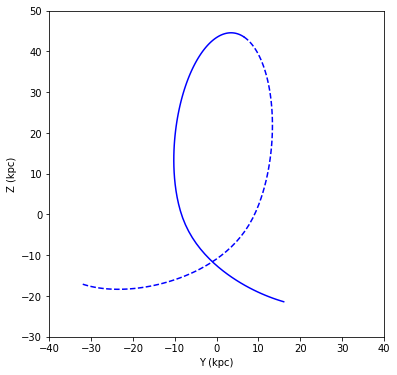

In [7]:
osr_fwd = osr()
delt_fwd = np.linspace(0, tdisrupt/to, 1000)
osr_fwd.integrate(delt_fwd, pot)

fig = plt.figure(figsize=(6,6))
plt.plot(osr.y(delt[:100])*ro,osr.z(delt[:100])*ro, 'b--')
plt.plot(osr_fwd.y(delt_fwd[:100])*ro, osr_fwd.z(delt_fwd[:100])*ro, 'b-')
plt.xlim(-40, 40)
plt.ylim(-30, 50)
plt.xlabel('Y (kpc)')
plt.ylabel('Z (kpc)')

## Including LMC

In [8]:
from galpy.potential import ChandrasekharDynamicalFrictionForce,HernquistPotential,MovingObjectPotential

In [9]:
mass_lmc=1.0e11 #solar masses
rscale_lmc=10.2 #kpc

#Initialize and integrate the orbit of the LMC
#Note orbit has to be integrated back 5 Gyr
#Note we assume the LMC experienced dynamical friction due to MW
o_lmc = Orbit.from_name('LMC', ro=ro, vo=vo, solarmotion=[-11.1, 24.0, 7.25])
ts= np.linspace(0.,-tdisrupt/to,1001)
cdf= ChandrasekharDynamicalFrictionForce(GMs=mass_lmc/mo, rhm=rscale_lmc/ro, dens=pot, ro=ro,vo=vo)
o_lmc.integrate(ts,pot+cdf)

#Setup a moving Hernquist potential to represent the LMC
pot_lmc = HernquistPotential(mass_lmc/mo,rscale_lmc/ro,ro=ro,vo=vo)
moving_pot_lmc = MovingObjectPotential(o_lmc, pot_lmc,ro=ro,vo=vo)

#Add the moving Hernquest potential to the MW
total_pot = [pot]
total_pot += [moving_pot_lmc]


#Orbit for Boo3 stream including lmc
o_lmc, oall_lmc, dtall_lmc = graphics.streamorbitslmc(mass, o, tdisrupt, pot, nstar)

In [10]:
# Orbits for Boo3 & Styx 'stream' including lmc potential
# Boo3
ob_lmc = o()
osp_lmc = osp()
osr_lmc = osr()

ob_lmc.integrate(delt, total_pot)
osp_lmc.integrate(delt, total_pot)
osr_lmc.integrate(delt, total_pot)

## Prograde orbit

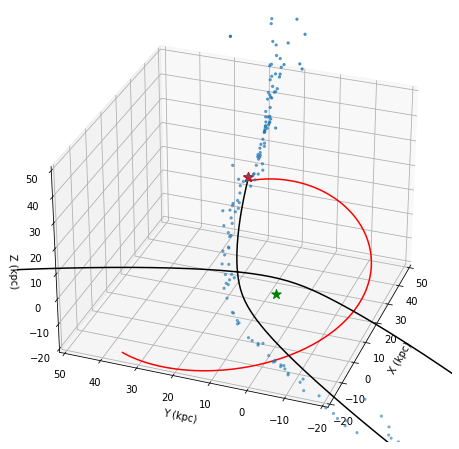

In [11]:
# 3D projection in x,y,z
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(oall_lmc.x(), oall_lmc.y(), oall_lmc.z(), marker='.')
ax.scatter(ob_lmc.x()*ro, ob_lmc.y()*ro, ob_lmc.z()*ro, marker='*', c='k', s = 100)

# Plotting the stream orbit
ax.plot(osp_lmc.x(delt[:150])*ro, osp_lmc.y(delt[:150])*ro, osp_lmc.z(delt[:150])*ro, c='r')
ax.scatter(ob_lmc.x()*ro, ob_lmc.y()*ro, ob_lmc.z()*ro, marker='*', c='r', s = 100)

# plotting the orbit of Boo3 over past 5yrs
ax.plot(ob_lmc.x(delt)*ro, ob_lmc.y(delt)*ro, ob_lmc.z(delt)*ro, c = 'k')

# Adding the centre of MW:
ax.scatter(0,0,0, marker = '*', c='g', s=100)

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')

ax.set_xlim(-20,50)
ax.set_ylim(-20,50)
ax.set_zlim(-20,50)

ax.view_init(30,200)
plt.show()

## Retrograde orbit

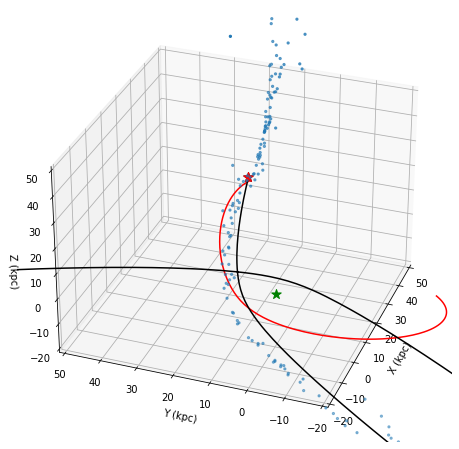

In [12]:
# 3D projection in x,y,z
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(oall_lmc.x(), oall_lmc.y(), oall_lmc.z(), marker='.')
ax.scatter(ob_lmc.x()*ro, ob_lmc.y()*ro, ob_lmc.z()*ro, marker='*', c='k', s = 100)

# Plotting the stream orbit
ax.plot(osr_lmc.x(delt[:150])*ro, osr_lmc.y(delt[:150])*ro, osr_lmc.z(delt[:150])*ro, c='r')
ax.scatter(ob_lmc.x()*ro, ob_lmc.y()*ro, ob_lmc.z()*ro, marker='*', c='r', s = 100)

# plotting the orbit of Boo3 over past 5yrs
ax.plot(ob_lmc.x(delt)*ro, ob_lmc.y(delt)*ro, ob_lmc.z(delt)*ro, c = 'k')

# Adding the centre of MW:
ax.scatter(0,0,0, marker = '*', c='g', s=100)

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')

ax.set_xlim(-20,50)
ax.set_ylim(-20,50)
ax.set_zlim(-20,50)


ax.view_init(30,200)
plt.show()

Text(0, 0.5, 'Z (kpc)')

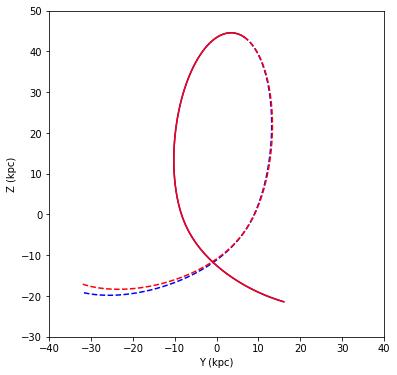

In [13]:
osr_lmc_fwd = osr_lmc()
delt_fwd = np.linspace(0, tdisrupt/to, 1000)
osr_lmc_fwd.integrate(delt_fwd, pot)

fig = plt.figure(figsize=(6,6))
plt.plot(osr_lmc.y(delt[:100])*ro,osr_lmc.z(delt[:100])*ro, 'b--')
plt.plot(osr_lmc_fwd.y(delt_fwd[:100])*ro, osr_lmc_fwd.z(delt_fwd[:100])*ro, 'b-')

plt.plot(osr.y(delt[:100])*ro,osr.z(delt[:100])*ro, 'r--')
plt.plot(osr_fwd.y(delt_fwd[:100])*ro, osr_fwd.z(delt_fwd[:100])*ro, 'r-')

plt.xlim(-40, 40)
plt.ylim(-30, 50)
plt.xlabel('Y (kpc)')
plt.ylabel('Z (kpc)')

In [14]:
>>> from galpy.potential import (evaluateRforces, evaluatephitorques,
                                 evaluatezforces)
>>> loc_origin= 1e-4 # Small offset in R to avoid numerical issues
>>> ax= lambda t: evaluateRforces(moving_pot_lmc,loc_origin,0.,phi=0.,t=t,
                                  use_physical=False)
>>> ay= lambda t: evaluatephitorques(moving_pot_lmc,loc_origin,0.,phi=0.,t=t,
                                    use_physical=False)/loc_origin
>>> az= lambda t: evaluatezforces(moving_pot_lmc,loc_origin,0.,phi=0.,t=t,
                                  use_physical=False)

>>> t_intunits= o_lmc.time(use_physical=False)[::-1] # need to reverse the order for interp
>>> ax4int= np.array([ax(t) for t in t_intunits])
>>> ax_int= lambda t: np.interp(t,t_intunits,ax4int)
>>> ay4int= np.array([ay(t) for t in t_intunits])
>>> ay_int= lambda t: np.interp(t,t_intunits,ay4int)
>>> az4int= np.array([az(t) for t in t_intunits])
>>> az_int= lambda t: np.interp(t,t_intunits,az4int)

>>> from galpy.potential import NonInertialFrameForce
>>> nip= NonInertialFrameForce(a0=[ax_int,ay_int,az_int])

Pericentre is at 8.76831311825143 kpc
Apocentre is at 167.98599445998317 kpc


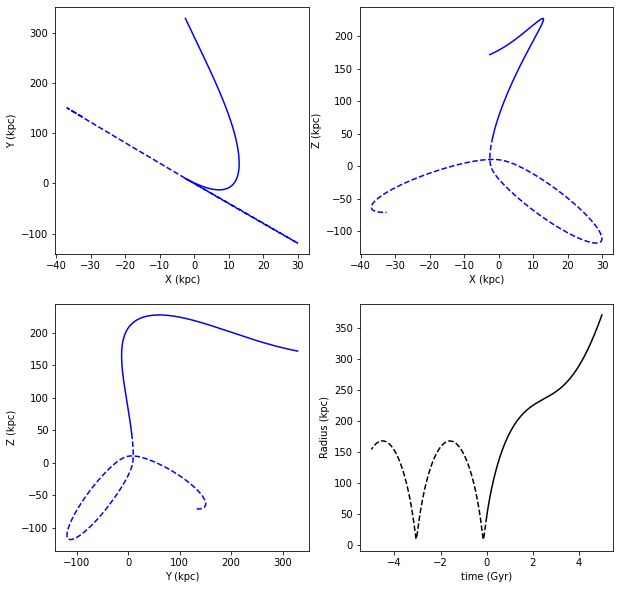

In [15]:
fig = graphics.orbit_plots(o, pot=pot + moving_pot_lmc + nip , tint=5)

In [20]:
spdf_lmc= streamspraydf(mass/mo,
                   progenitor=o,
                   pot=pot + moving_pot_lmc + nip,
                   tdisrupt=tdisrupt/to,
                   rtpot=pot)
#Distribution function for the trailing tail
spdft_lmc= streamspraydf(mass/mo,
                   progenitor=o,
                   pot=pot + moving_pot_lmc + nip,
                   tdisrupt=tdisrupt/to,
                   rtpot=pot,
                   leading=False)


RvR_lmc,dt_lmc= spdf_lmc.sample(n=nstar,returndt=True,integrate=True)
RvRt_lmc,dtt_lmc= spdft_lmc.sample(n=nstar,returndt=True,integrate=True)

vxvva_lmc=np.column_stack([np.append(RvR_lmc[0],RvRt_lmc[0]),
                       np.append(RvR_lmc[1],RvRt_lmc[1]),
                       np.append(RvR_lmc[2],RvRt_lmc[2]),
                       np.append(RvR_lmc[3],RvRt_lmc[3]),
                       np.append(RvR_lmc[4],RvRt_lmc[4]),
                       np.append(RvR_lmc[5],RvRt_lmc[5])])

oall_lmc_a=Orbit(vxvva_lmc,ro=ro,vo=vo,solarmotion=[-11.1, 24.0, 7.25])
dtall_lmc_a=np.append(dt_lmc,dtt_lmc)

In [21]:
delt = np.linspace(0, -tdisrupt/to, 1000)

ob_lmc_a = o()
osp_lmc_a = osp()
osr_lmc_a = osr()

ob_lmc_a.integrate(delt, pot + moving_pot_lmc + nip)
osp_lmc_a.integrate(delt, pot + moving_pot_lmc + nip)
osr_lmc_a.integrate(delt, pot + moving_pot_lmc + nip)

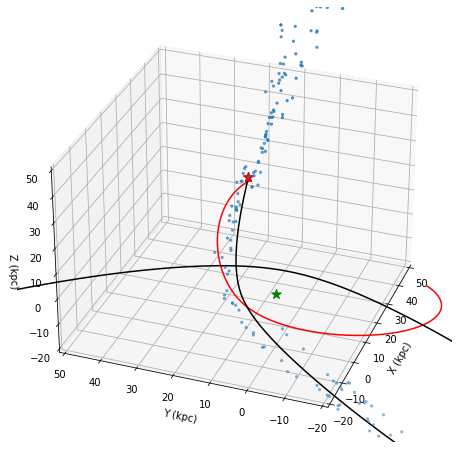

In [22]:
# 3D projection in x,y,z
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(oall_lmc_a.x(), oall_lmc_a.y(), oall_lmc_a.z(), marker='.')
ax.scatter(ob_lmc_a.x()*ro, ob_lmc_a.y()*ro, ob_lmc_a.z()*ro, marker='*', c='k', s = 100)

# Plotting the stream orbit
ax.plot(osr_lmc_a.x(delt[:150])*ro, osr_lmc_a.y(delt[:150])*ro, osr_lmc_a.z(delt[:150])*ro, c='r')
ax.scatter(ob_lmc_a.x()*ro, ob_lmc_a.y()*ro, ob_lmc_a.z()*ro, marker='*', c='r', s = 100)

# plotting the orbit of Boo3 over past 5yrs
ax.plot(ob_lmc_a.x(delt)*ro, ob_lmc_a.y(delt)*ro, ob_lmc_a.z(delt)*ro, c = 'k')

# Adding the centre of MW:
ax.scatter(0,0,0, marker = '*', c='g', s=100)

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')

ax.set_xlim(-20,50)
ax.set_ylim(-20,50)
ax.set_zlim(-20,50)


ax.view_init(30,200)
plt.show()